In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
 shear_range = 0.2,
 zoom_range = 0.2,
 horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory('train',
 target_size = (64, 64),
 batch_size = 32,
 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('test',
 target_size = (64, 64),
 batch_size = 32,
 class_mode = 'binary')

Found 3192 images belonging to 2 classes.
Found 2058 images belonging to 2 classes.


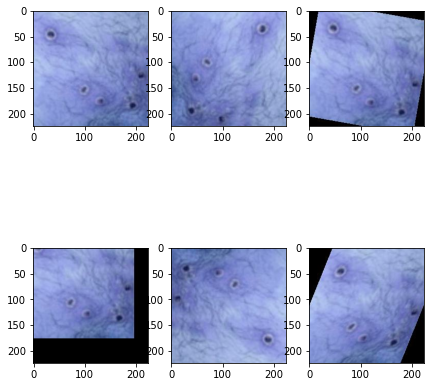

In [6]:
import glob
import cv2
file='train\monkeypox\*.jpg'
images=[cv2.imread(image) for image in glob.glob(file)]
rows=2
cols=3
fig=plt.figure(figsize=(7,8))
for j in range(0,rows*cols):
    fig.add_subplot(rows,cols,j+1)
    plt.imshow(images[j])

In [7]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3),
 input_shape = (64, 64, 3),
 activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [8]:
classifier.compile(optimizer = 'adam',
 loss = 'binary_crossentropy',
 metrics = ['accuracy'])

In [9]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [10]:
history=classifier.fit(training_set,epochs = 20,
 validation_data = test_set,
 )

Epoch 1/20
100/100 [==============================] - 30s 282ms/step - loss: 0.6459 - accuracy: 0.6341 - val_loss: 0.6505 - val_accuracy: 0.5603
Epoch 2/20
100/100 [==============================] - 26s 261ms/step - loss: 0.6172 - accuracy: 0.6548 - val_loss: 0.6239 - val_accuracy: 0.5792
Epoch 3/20
100/100 [==============================] - 26s 262ms/step - loss: 0.5916 - accuracy: 0.6852 - val_loss: 0.5192 - val_accuracy: 0.6944
Epoch 4/20
100/100 [==============================] - 26s 264ms/step - loss: 0.5655 - accuracy: 0.7137 - val_loss: 0.4898 - val_accuracy: 0.7337
Epoch 5/20
100/100 [==============================] - 26s 262ms/step - loss: 0.5495 - accuracy: 0.7118 - val_loss: 0.5672 - val_accuracy: 0.6710
Epoch 6/20
100/100 [==============================] - 26s 261ms/step - loss: 0.5248 - accuracy: 0.7306 - val_loss: 0.7739 - val_accuracy: 0.5666
Epoch 7/20
100/100 [==============================] - 26s 259ms/step - loss: 0.4961 - accuracy: 0.7547 - val_loss: 0.6576 - val_ac

In [11]:
training_set.class_indices

{'monkeypox': 0, 'others': 1}

In [15]:
test_image = tf.keras.utils.load_img('Samples\my.jpg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
if result[0][0] == 1:
     prediction = 'others'
else:
     prediction = 'monkeypox'
print(prediction)

1/1 [==============================] - 0s 203ms/step
others


In [31]:
classifier.save('monkey.h5')

In [ ]:
model=tf.keras.models.load_model('monkey.h5')

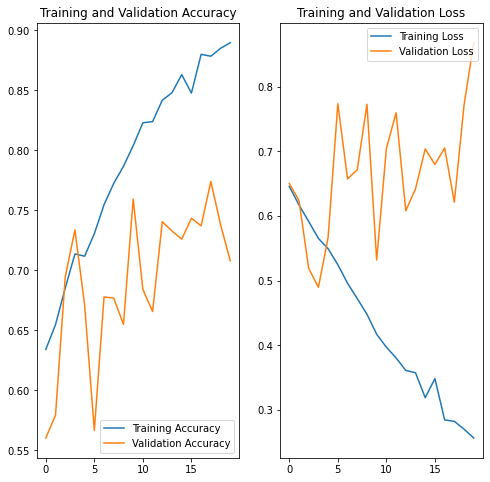

In [13]:
epochs=20
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()